# Adagrad

Adagrad Execution Time: 0.0062 seconds


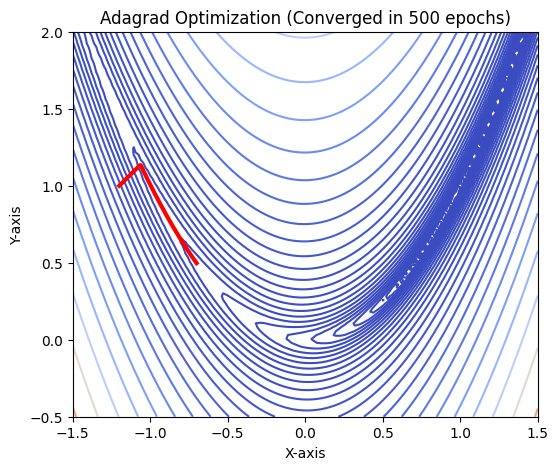

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time

def rosenbrock(x, y):
    return (1 - x) ** 2 + 100 * (y - x**2) ** 2

def gradient(x, y):
    dx = -2 * (1 - x) - 400 * x * (y - x**2)
    dy = 200 * (y - x**2)
    return np.array([dx, dy])

def adagrad(learning_rate=0.1, epsilon=1e-8, iterations=500):
    start_time = time.time()
    x, y = -1.2, 1.0
    grad_accum = np.zeros(2)
    positions = [(x, y)]

    for epoch in range(iterations):
        grad = gradient(x, y)
        grad_accum += grad ** 2
        adjusted_grad = grad / (np.sqrt(grad_accum) + epsilon)
        x -= learning_rate * adjusted_grad[0]
        y -= learning_rate * adjusted_grad[1]
        positions.append((x, y))
        if np.linalg.norm(grad) < 1e-6:
            print(f"Adagrad Converged in {epoch + 1} epochs")
            break

    end_time = time.time()
    print(f"Adagrad Execution Time: {end_time - start_time:.4f} seconds")

    return positions, epoch + 1, end_time - start_time

def plot_adagrad():
    positions, epochs, exec_time = adagrad()
    fig, ax = plt.subplots(figsize=(6, 5))
    x_vals = np.linspace(-1.5, 1.5, 100)
    y_vals = np.linspace(-0.5, 2, 100)
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = rosenbrock(X, Y)
    ax.contour(X, Y, Z, levels=np.logspace(-1, 3, 30), cmap="coolwarm")

    scatter, = ax.plot([], [], "r-", markersize=6, linewidth=3)  # Thick Red Line

    def update(frame):
        scatter.set_data([p[0] for p in positions[:frame]], [p[1] for p in positions[:frame]])
        return scatter,

    ani = animation.FuncAnimation(fig, update, frames=len(positions), interval=50, blit=True)
    ani.save("adagrad_optimization.gif", writer="pillow")
    plt.title(f"Adagrad Optimization (Converged in {epochs} epochs)")
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")

    plt.show()

plot_adagrad()


# RMSProp

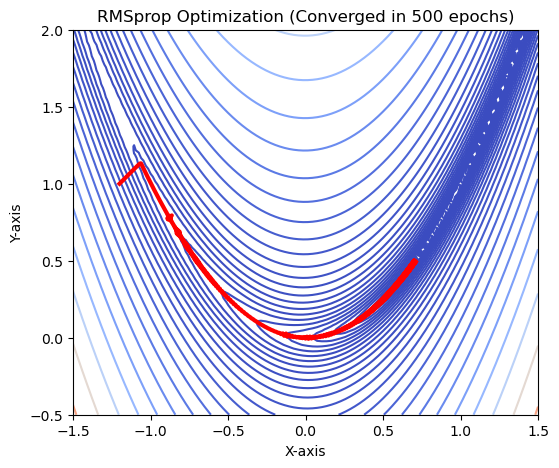

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time

def rosenbrock(x, y):
    return (1 - x) ** 2 + 100 * (y - x**2) ** 2

def gradient(x, y):
    dx = -2 * (1 - x) - 400 * x * (y - x**2)
    dy = 200 * (y - x**2)
    return np.array([dx, dy])

def rmsprop(learning_rate=0.01, decay_rate=0.9, epsilon=1e-8, max_iterations=500):
    start_time = time.time()
    x, y = -1.2, 1.0
    grad_squared = np.zeros(2)
    positions = [(x, y)]
    losses = [rosenbrock(x, y)]

    for epoch in range(max_iterations):
        grad = gradient(x, y)
        grad_squared = decay_rate * grad_squared + (1 - decay_rate) * (grad ** 2)
        adjusted_grad = grad / (np.sqrt(grad_squared) + epsilon)
        x -= learning_rate * adjusted_grad[0]
        y -= learning_rate * adjusted_grad[1]
        positions.append((x, y))
        losses.append(rosenbrock(x, y))

        if np.linalg.norm(grad) < 1e-6:
            break

    end_time = time.time()
    return positions, losses, epoch + 1, end_time - start_time

def plot_rmsprop():
    positions, losses, epochs, exec_time = rmsprop()

    fig, ax = plt.subplots(figsize=(6, 5))
    x_vals = np.linspace(-1.5, 1.5, 100)
    y_vals = np.linspace(-0.5, 2, 100)
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = rosenbrock(X, Y)

    ax.contour(X, Y, Z, levels=np.logspace(-1, 3, 30), cmap="coolwarm")
    ax.plot([p[0] for p in positions], [p[1] for p in positions], "r-", linewidth=3)

    plt.title(f"RMSprop Optimization (Converged in {epochs} epochs)")
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.show()

plot_rmsprop()
